#  Research Topic: The Factors Associated with Suicide Rates

# Introduction: Background information

Mental health is very important to all of us in our fast-paced life. Many NGOs and schools are holding a lot of activities in promoting a healthy mental state. When we browsing data on Kaggle, one data about suicide rates caught our eyes. We are very interested in suicide rates, which is severe mental health to the extreme. 

Supposedly, people in developed countries should be in a good economic state and should have good lives. On the other hand, we think that these developed countries also encourage indivisuality and people are likely to be open about suicides. We would like to take a deeper look at the data to find out what factors are associated with suicide rates.
The dataset has suicide and economic records from 101 countries for different ages and generations.  a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development.

Variables in our dataset includes:
 - Year
 - Country
 - Age
 - Sex: Female & Male
 - Suicide Rates: suicides/100k population
 - GDP
 - GDP per capita
 - HDI: a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development.
 - Generations:  people born in   
   - 2000 to present: Generation Z.
   - 1980 to 2000: Millennials
   - 1965 to 1979: Generation X.
   - 1946 to 1964: Boomers.
   - 1925 to 1945: Silent Generation.
   - 1900 to 1924: G.I. Generation.
   
Because the entire dataset has worldwide data and is hard to find insights, we want to narrow down our research area into two regions. We want to compare regions where we normally associated with good social welfare and peaceful life, and where with political conflicts and constant wars. We choose middle east and northern Europe as these two regions and select five countries with the largest population within these two regions.

# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We download our dataset from Kaggle, and the variables in the dataset are : country,year,sex,age,suicide number, population, suicides/100k pop,gdp, gsp per capita, generation and HDI. The HDI data is not complete in our dataset so we find more official data and implement them into our dataset. Then we have HDI data from 1990 to 2017. For further analysis of suicide, we use suicide rate to represent suicides/100k pop.

In [3]:
total = pd.read_csv('131project.csv')
total = total.rename(columns = {'suicides/100k pop':'suicide_rate'})
total = total.rename(columns = {'gdp_per_capita ($)':'gdpc'})
total = total.rename(columns = {' gdp_for_year ($) ':'gdp'})
HDIdata = pd.read_csv('HDI.csv')
HDIdata = HDIdata.melt('Country')
HDIdata.rename(columns = {'variable':'year', 'value':'HDI'}, inplace=True)
HDIdata['year'] = HDIdata.year.astype(int)
HDIdata['Country'] = HDIdata['Country'].str[1:]
HDIdata.head()
total = total.drop(columns='HDI for year')
total = pd.merge(total, HDIdata,  how='left', left_on=['country', 'year'], right_on = ['Country', 'year'])
total = total.drop(columns='Country')
total.rename(columns = {'HDI_y':'HDI'}, inplace=True)
total.head()

KeyError: "['HDI for year'] not found in axis"

We are intrested in how suicide rate may differ in middleeast area and northern europe. We choose 'Cyprus','Israel','Bahrain','Oman','Qatar' to represent middleeast countries and 'Iceland', 'Finland','Denmark','Norway','Sweden' to represent northern europe countries.

In [3]:
middleeastcountry=['Cyprus','Israel','Bahrain','Oman','Qatar']

northeuropecountry=['Iceland', 'Finland','Denmark','Norway','Sweden']
middleeast=total[total.country.isin(middleeastcountry)]
northeurope=total[total.country.isin(northeuropecountry)]

middleeast.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI
2636,Bahrain,1985,male,25-34 years,7,67600,10.36,Bahrain1985,3651861702,9980,Boomers,NaN
2637,Bahrain,1985,male,35-54 years,3,49700,6.04,Bahrain1985,3651861702,9980,Silent,NaN
2638,Bahrain,1985,female,35-54 years,1,26900,3.72,Bahrain1985,3651861702,9980,Silent,NaN
2639,Bahrain,1985,female,15-24 years,0,37800,0.00,Bahrain1985,3651861702,9980,Generation X,NaN
2640,Bahrain,1985,female,25-34 years,0,27600,0.00,Bahrain1985,3651861702,9980,Boomers,NaN


In [4]:
northeurope.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI
7418,Denmark,1994,male,75+ years,89,131700,67.58,Denmark1994,156162311732,32034,G.I. Generation,0.824
7419,Denmark,1994,male,55-74 years,189,448200,42.17,Denmark1994,156162311732,32034,Silent,0.824
7420,Denmark,1994,male,35-54 years,279,755600,36.92,Denmark1994,156162311732,32034,Boomers,0.824
7421,Denmark,1994,female,75+ years,70,230600,30.36,Denmark1994,156162311732,32034,G.I. Generation,0.824
7422,Denmark,1994,male,25-34 years,85,414100,20.53,Denmark1994,156162311732,32034,Boomers,0.824


Then we draw histograms and summaries for gdp,gdpc,suicide_rate, and HDI of middleeast countries. We can see that HDI has mean value of 0.832291 and does not have a clear trend. GDP has mean value of 8.028445e+10 and has a very high frequency in the first bin. GDPC has mean value of 30394.570866 and mostly falls between 0-25500. Suicide rate has mean value of 4.653661 and 50% of suiside rate is equal or below 1.89.

,gdp,gdpc,suicide_rate,HDI
count,1.016000e+03,1016.000000,1016.000000,920.000000
mean,8.028445e+10,30394.570866,4.653661,0.832291
std,7.927354e+10,21051.600958,7.369842,0.033468
min,3.392021e+09,7325.000000,0.000000,0.779000
25%,2.040371e+10,17497.000000,0.000000,0.799000
50%,4.453049e+10,23451.000000,1.890000,0.831000
75%,1.251223e+11,33816.000000,6.185000,0.855000
max,3.084170e+11,93270.000000,66.180000,0.901000


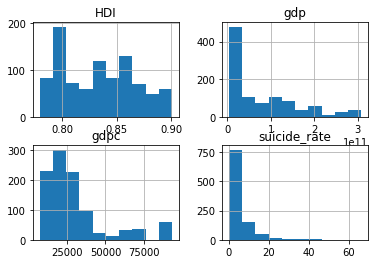

In [24]:
middleeast[['gdp','gdpc','suicide_rate','HDI']].hist()
middleeast[['gdp','gdpc','suicide_rate','HDI']].describe()

Then we draw histograms and summaries for gdp,gdpc,suicide_rate, and HDI of northern europe countries. We can see that HDI has mean value of 0.884046 which is larger than middleeast countries. GDP has mean value of 2.043875e+11 which is higher than middleeast and the frequency distribution is not concentrated in one bin. GDPC has mean value of 44276.962617. Suicide rate has mean value of 15.445082 which is a lot higher than that of middleeast. We are quite surprise to find it and want to explore on suiside rate vs GDPC/HDI further.

,gdp,gdpc,suicide_rate,HDI
count,1.712000e+03,1712.000000,1712.000000,1532.000000
mean,2.043875e+11,44276.962617,15.445082,0.884046
std,1.543261e+11,19830.340628,14.749128,0.040050
min,2.939845e+09,13357.000000,0.000000,0.784000
25%,9.423006e+10,29311.000000,4.775000,0.856000
50%,1.786352e+11,38997.000000,10.960000,0.895000
75%,2.837425e+11,55352.500000,22.852500,0.911000
max,5.787420e+11,109804.000000,90.060000,0.948000


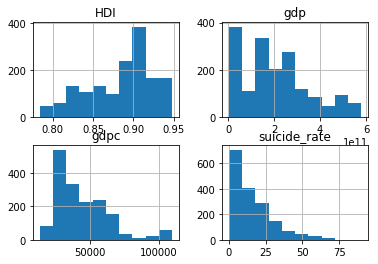

In [25]:
northeurope[['gdp','gdpc','suicide_rate','HDI']].hist()
northeurope[['gdp','gdpc','suicide_rate','HDI']].describe()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


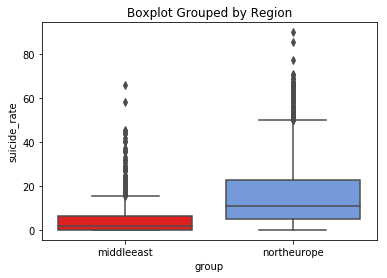

In [36]:

middleeast['group']=['middleeast']*1016
northeurope['group']=['northeurope']*1712

palette=["red", "cornflowerblue"]
both=pd.concat([middleeast, northeurope])

#two areas
box_area = sns.boxplot(data = both,
                x = 'group',
                y = 'suicide_rate',
                palette = palette)

box_area.set_title('Boxplot Grouped by Region') #
plt.show()


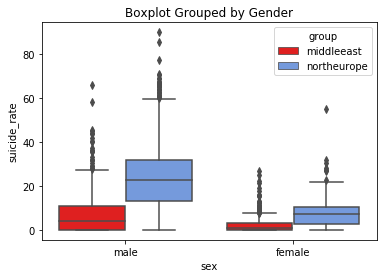

In [37]:
# by gender

box_gender = sns.boxplot(data = both,
                hue = 'group', # different colors for different 'cls'
                x = 'sex',
                y = 'suicide_rate',
                palette = palette
                        )

box_gender.set_title('Boxplot Grouped by Gender') # You can change the title here
plt.show()



In both regions, males are more likely to commit to suicide than females. In general, suidecide rates are much higher in Northern Europe.

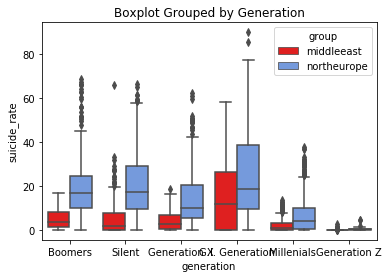

In [38]:
# by generation
box_generation = sns.boxplot(data = both,
                hue = 'group', # different colors for different 'cls'
                x = 'generation',
                y = 'suicide_rate',
                palette = palette)

box_generation.set_title('Boxplot Grouped by Generation') #
plt.show()


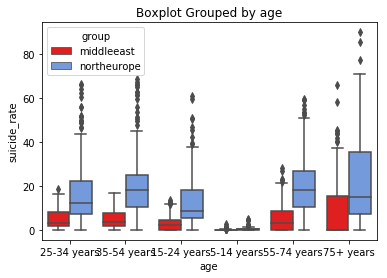

In [39]:

# by age
box_age = sns.boxplot(data = both,
                hue = 'group', # different colors for different 'cls'
                x = 'age',
                y = 'suicide_rate',
                palette = palette)

box_age.set_title('Boxplot Grouped by age') #
plt.show()

## Middle east

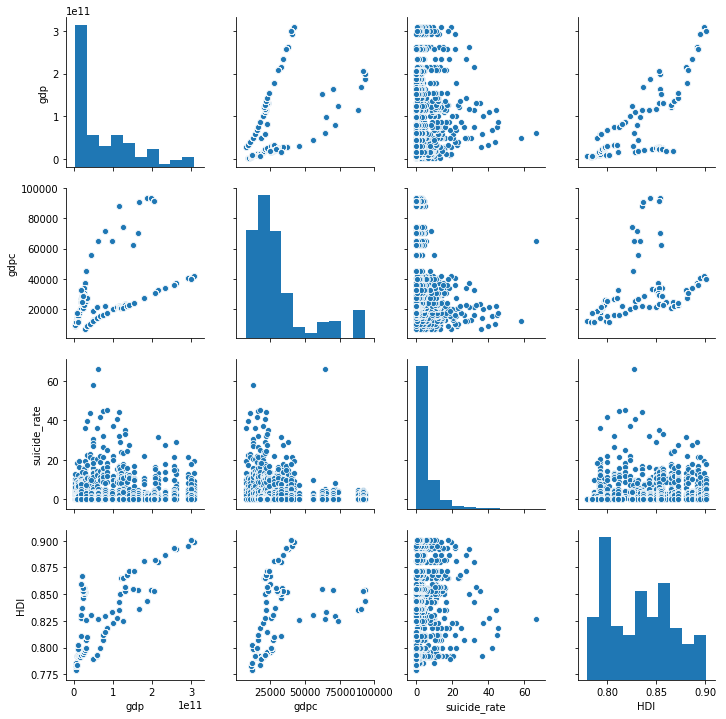

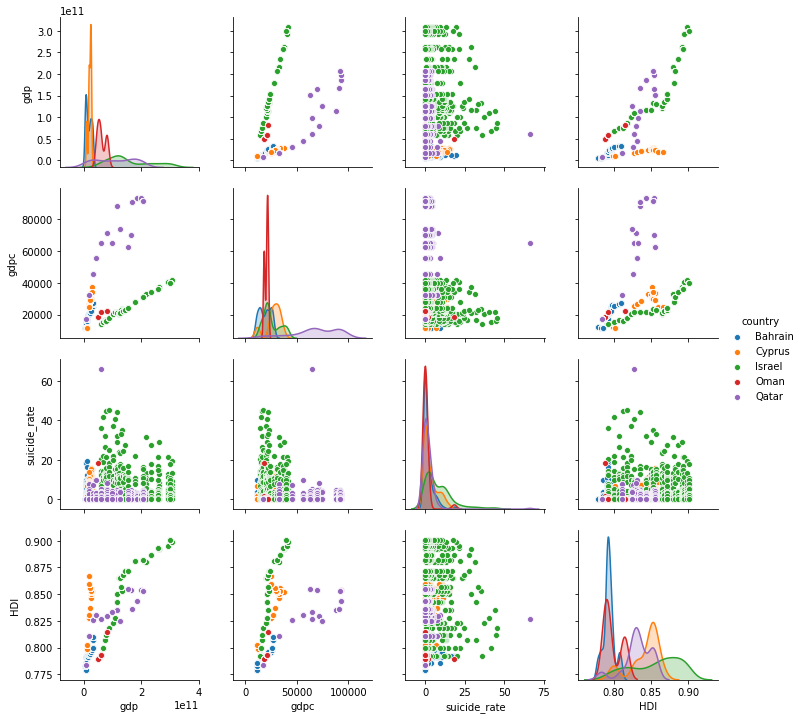

In [20]:
sns.pairplot(middleeast[['gdp','gdpc','suicide_rate','HDI']])
sns.pairplot(middleeast[['gdp','gdpc','suicide_rate','HDI','country']].dropna(), hue="country")

### gdpc and suiside rate

,gdpc,suicide_rate
gdpc,1.00000,-0.30887
suicide_rate,-0.30887,1.00000


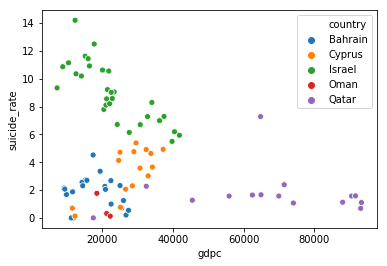

In [9]:
gdp_plot = middleeast.groupby([middleeast.country, middleeast.year]).gdpc.mean()
suicide_rate_plot = middleeast.groupby([middleeast.country, middleeast.year]).suicide_rate.mean()

joint = pd.DataFrame(gdp_plot).join(pd.DataFrame(suicide_rate_plot))

#plt.scatter(joint.gdpc, joint.suicide_rate)
joint_reset = joint.reset_index()

sns.scatterplot(joint_reset.gdpc, joint_reset.suicide_rate, hue = joint_reset.country)
joint.corr()

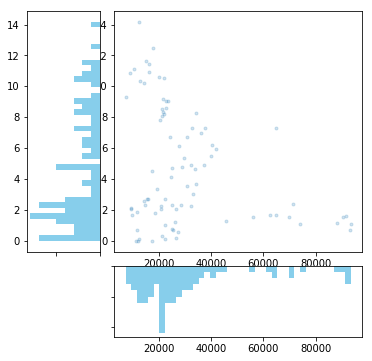

In [10]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4)   ## 4 x 4 grid
main_ax = fig.add_subplot(grid[:-1, 1:]) # vertically, we start at the beginning, and leave one space


# horizontally, we start at the second and go to the end
y_hist = fig.add_subplot(grid[:-1, 0 ], xticklabels=[], sharey=main_ax) # share y axis with main, no ticks on x
x_hist = fig.add_subplot(grid[ -1, 1:], yticklabels=[], sharex=main_ax) # share x axis with main, no ticks on y

# scatter points on the main axes
main_ax.plot(joint_reset.gdpc, joint_reset.suicide_rate, 'o', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(joint_reset.gdpc, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
x_hist.invert_yaxis()

y_hist.hist(joint_reset.suicide_rate, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()


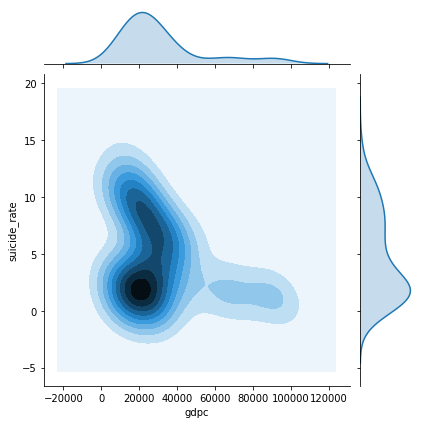

In [12]:
sns.jointplot(x="gdpc", y="suicide_rate", data=joint_reset, kind="kde")

In [ ]:
sns.pairplot(iris, hue="species")

### HDI vs suiside rate

,HDI,suicide_rate
HDI,1.000000,0.395003
suicide_rate,0.395003,1.000000


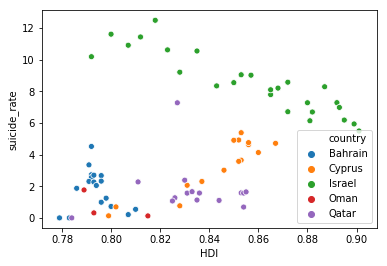

In [28]:
mid_nona = middleeast.dropna(subset=['HDI'])
hdiplot = mid_nona.groupby([mid_nona.country, mid_nona.year]).HDI.mean()
suiplot = mid_nona.groupby([mid_nona.country, mid_nona.year]).suicide_rate.mean()

hdijoint = pd.DataFrame(hdiplot).join(pd.DataFrame(suiplot))

hdi_reset = hdijoint.reset_index()

sns.scatterplot(hdi_reset.HDI, hdi_reset.suicide_rate, hue = hdi_reset.country)
hdijoint.corr()

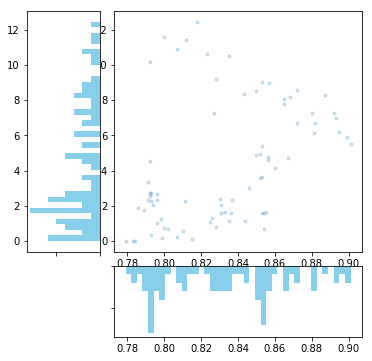

In [29]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4)   ## 4 x 4 grid
main_ax = fig.add_subplot(grid[:-1, 1:]) # vertically, we start at the beginning, and leave one space


# horizontally, we start at the second and go to the end
y_hist = fig.add_subplot(grid[:-1, 0 ], xticklabels=[], sharey=main_ax) # share y axis with main, no ticks on x
x_hist = fig.add_subplot(grid[ -1, 1:], yticklabels=[], sharex=main_ax) # share x axis with main, no ticks on y

# scatter points on the main axes
main_ax.plot(hdi_reset.HDI, hdi_reset.suicide_rate, 'o', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(hdi_reset.HDI, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
x_hist.invert_yaxis()

y_hist.hist(hdi_reset.suicide_rate, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()

## Northen europe

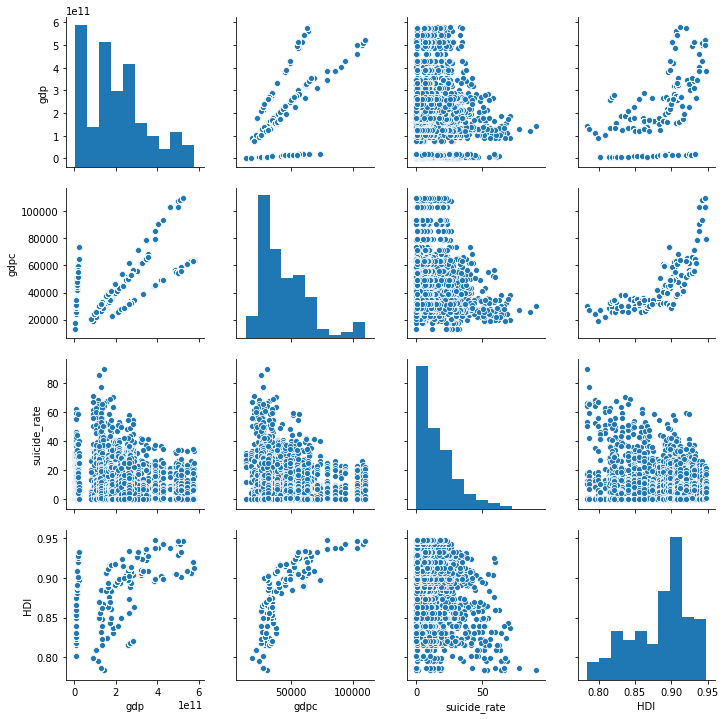

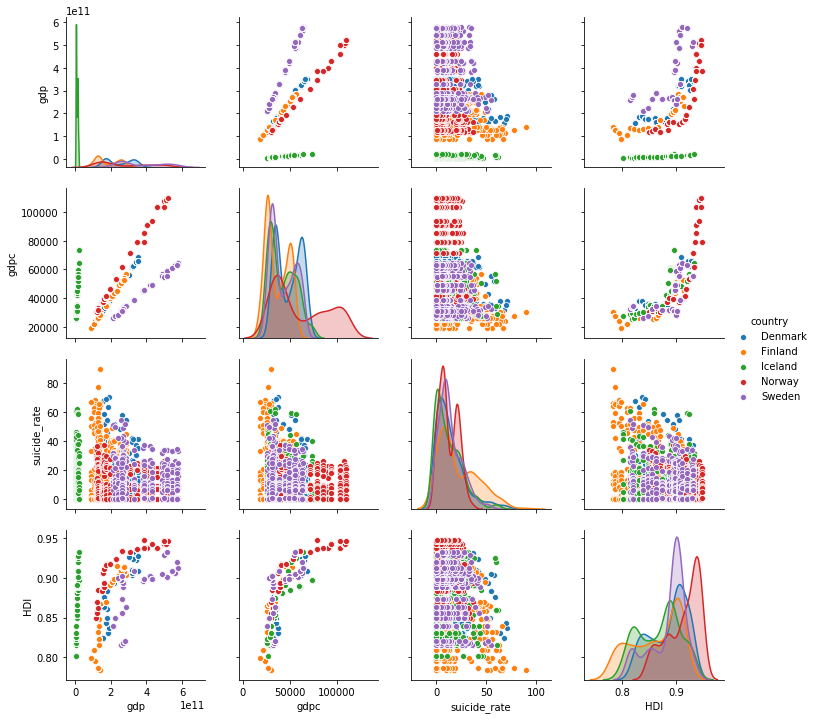

In [21]:
sns.pairplot(northeurope[['gdp','gdpc','suicide_rate','HDI']])
sns.pairplot(northeurope[['gdp','gdpc','suicide_rate','HDI','country']].dropna(), hue="country")

### gdpc vs suiside rate

,gdpc,suicide_rate
gdpc,1.000000,-0.493508
suicide_rate,-0.493508,1.000000


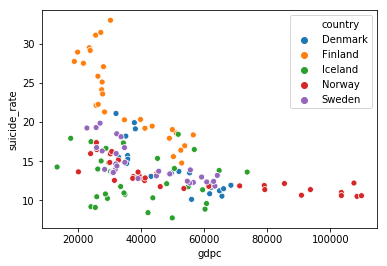

In [14]:
gdp_plot2 = northeurope.groupby([northeurope.country, northeurope.year]).gdpc.mean()
suicide_rate_plot2 = northeurope.groupby([northeurope.country, northeurope.year]).suicide_rate.mean()

joint2 = pd.DataFrame(gdp_plot2).join(pd.DataFrame(suicide_rate_plot2))

#plt.scatter(joint.gdpc, joint.suicide_rate)
joint_reset2 = joint2.reset_index()

sns.scatterplot(joint_reset2.gdpc, joint_reset2.suicide_rate, hue = joint_reset2.country)
joint2.corr()

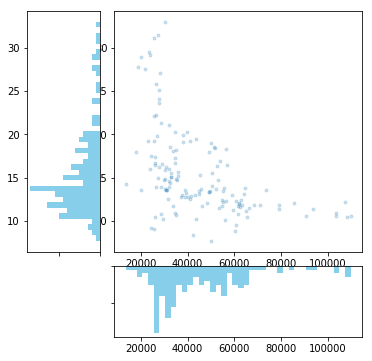

In [15]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4)   ## 4 x 4 grid
main_ax = fig.add_subplot(grid[:-1, 1:]) # vertically, we start at the beginning, and leave one space


# horizontally, we start at the second and go to the end
y_hist = fig.add_subplot(grid[:-1, 0 ], xticklabels=[], sharey=main_ax) # share y axis with main, no ticks on x
x_hist = fig.add_subplot(grid[ -1, 1:], yticklabels=[], sharex=main_ax) # share x axis with main, no ticks on y

# scatter points on the main axes
main_ax.plot(joint_reset2.gdpc, joint_reset2.suicide_rate, 'o', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(joint_reset2.gdpc, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
x_hist.invert_yaxis()

y_hist.hist(joint_reset2.suicide_rate, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()


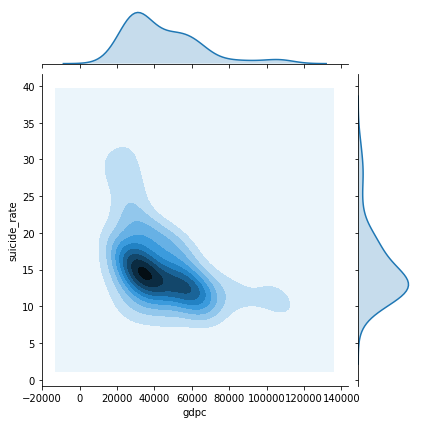

In [17]:
sns.jointplot(x="gdpc", y="suicide_rate", data=joint_reset2, kind="kde")

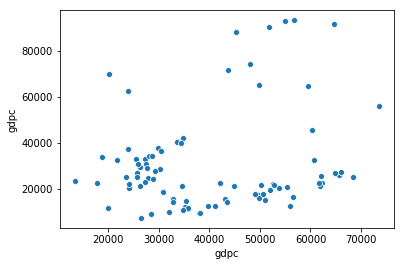

In [35]:
sns.scatterplot(joint_reset2.gdpc, joint_reset.gdpc)

### HDI vs suiside rate

,HDI,suicide_rate
HDI,1.00000,-0.62295
suicide_rate,-0.62295,1.00000


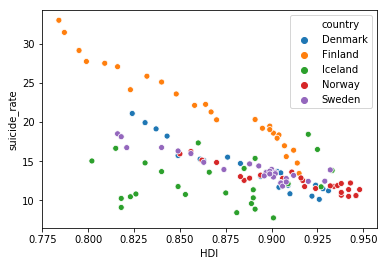

In [30]:
europe_nona = northeurope.dropna(subset=['HDI'])
hdiplot2 = europe_nona.groupby([europe_nona.country, europe_nona.year]).HDI.mean()
suiplot2 = europe_nona.groupby([europe_nona.country, europe_nona.year]).suicide_rate.mean()

hdijoint2 = pd.DataFrame(hdiplot2).join(pd.DataFrame(suiplot2))

hdi_reset2 = hdijoint2.reset_index()

sns.scatterplot(hdi_reset2.HDI, hdi_reset2.suicide_rate, hue = hdi_reset2.country)
hdijoint2.corr()

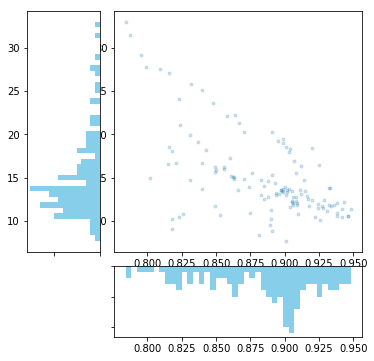

In [31]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4)   ## 4 x 4 grid
main_ax = fig.add_subplot(grid[:-1, 1:]) # vertically, we start at the beginning, and leave one space


# horizontally, we start at the second and go to the end
y_hist = fig.add_subplot(grid[:-1, 0 ], xticklabels=[], sharey=main_ax) # share y axis with main, no ticks on x
x_hist = fig.add_subplot(grid[ -1, 1:], yticklabels=[], sharex=main_ax) # share x axis with main, no ticks on y

# scatter points on the main axes
main_ax.plot(hdi_reset2.HDI, hdi_reset2.suicide_rate, 'o', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(hdi_reset2.HDI, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
x_hist.invert_yaxis()

y_hist.hist(hdi_reset2.suicide_rate, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()

# Data modeling

In [1]:
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
middleeast['suicide_rate_mod'] = middleeast.suicide_rate.pow(1/5) 

In [ ]:
# middleeast OLS
model = smf.ols('suicide_rate_mod ~  sex + age + generation + gdpc + HDI + gdp', data = middleeast)
results = model.fit()
results.summary()

In [ ]:
# middleeast cross validation
from sklearn.model_selection import train_test_split
X_middleeast = middleeast[[ 'sex' , 'age' , 'generation' , 'HDI' , 'gdpc' , 'gdp']]
X_middleeast.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_middleeast, middleeast.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.ols('suicide_rate ~ sex + age + generation + HDI + gdpc + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE
sum((cvPredictionLM - y_test)**2)


In [ ]:
#middleeast GLM
glmmodel = smf.glm('suicide_rate_mod ~ sex + age + generation + gdpc + HDI + gdp', data = middleeast, family=sm.families.Gaussian())
glmresults = glmmodel.fit()
glmresults.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_middleeast = middleeast[['sex' , 'age' , 'generation' , 'HDI' , 'gdpc' , 'gdp']]
X_middleeast.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_middleeast, middleeast.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.glm('suicide_rate ~ sex + age + generation + HDI + gdpc + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MS
sum((cvPredictionLM - y_test)**2)


In [ ]:
middleeastNOZERO = middleeast.loc[middleeast.suicide_rate != 0]

In [ ]:
# middleeast_no_zero OLS
modelNoZero = smf.ols('suicide_rate_mod ~  sex + age + generation + gdpc + HDI + gdp', data = middleeastNOZERO)
resultsNoZero = modelNoZero.fit()
resultsNoZero.summary()


In [ ]:
# middleeast_no_zero cross validation
from sklearn.model_selection import train_test_split
X_middleeast = middleeastNOZERO[[ 'sex' , 'age' , 'generation' , 'HDI' , 'gdpc' , 'gdp']]
X_middleeast.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_middleeast, middleeastNOZERO.suicide_rate_mod, test_size=0.2, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.ols('suicide_rate ~ sex + age + generation + HDI + gdpc + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE
sum((cvPredictionLM - y_test)**2)

In [ ]:
#middleeast_no_zero GLM
glmmodelNoZero = smf.glm('suicide_rate_mod ~ sex + age + generation + gdpc + HDI + gdp', data = middleeastNOZERO, family=sm.families.Gaussian())
glmresultsNoZero = glmmodelNoZero.fit()
glmresultsNoZero.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_middleeast = middleeastNOZERO[[ 'sex' , 'age' , 'generation' , 'HDI' , 'gdpc' , 'gdp']]
X_middleeast.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_middleeast, middleeastNOZERO.suicide_rate_mod, test_size=0.2, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.glm('suicide_rate ~ sex + age + generation + HDI + gdpc + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE
sum((cvPredictionLM - y_test)**2)


In [ ]:
northeurope['suicide_rate_mod'] = northeurope.suicide_rate.pow(1/5)

In [ ]:
#northeurope OLS
model = smf.ols('suicide_rate_mod ~ sex + age + gdpc + HDI + gdpc +gdp', data = northeurope)
results = model.fit()
results.summary()

In [ ]:
#northeurope
from sklearn.model_selection import train_test_split
X_northeurope = northeurope[['country', 'sex' , 'age' , 'gdpc' , 'HDI' , 'gdp']]
X_northeurope.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_northeurope, northeurope.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.ols('suicide_rate ~ sex + age + gdpc + HDI + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE
sum((cvPredictionLM - y_test)**2)


In [ ]:
#northeurope GLM
glmmodel = smf.glm('suicide_rate_mod ~ sex + age + generation + gdpc + HDI + gdp', data = northeurope, family=sm.families.Gaussian())
glmresults = glmmodel.fit()
glmresults.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_northeurope = northeurope[['sex' ,  'age' , 'HDI' , 'generation', 'gdp' , 'gdpc']]
X_northeurope.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_northeurope, northeurope.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.glm('suicide_rate ~ sex + age + gdpc + HDI + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE
sum((cvPredictionLM - y_test)**2)


In [ ]:
#northeurope_no_zero OLS
modelNoZero = smf.ols('suicide_rate_mod ~ sex + age + generation + gdpc + HDI + gdp', data = northeuropeNOZERO)
resultsNoZero = modelNoZero.fit()
resultsNoZero.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_northeurope = northeuropeNOZERO[[ 'sex' , 'generation' , 'age' , 'HDI' , 'gdp' ,'gdpc']]
X_northeurope.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_northeurope, northeuropeNOZERO.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.ols('suicide_rate ~ sex + age + generation + gdpc + HDI + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE
sum((cvPredictionLM - y_test)**2)


In [ ]:
#northeurope_no_zero GLM
glmmodel = smf.glm('suicide_rate_mod ~ sex + age + generation + gdpc + HDI + gdp', data = northeuropeNOZERO, family=sm.families.Gaussian())
glmresults = glmmodel.fit()
glmresults.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_northeurope = northeuropeNOZERO[[ 'sex' , 'age' , 'generation' , 'HDI' , 'gdpc' , 'gdp']]
X_northeurope.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_northeurope, northeuropeNOZERO.suicide_rate_mod, test_size=0.2, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.glm('suicide_rate ~ sex + age + generation + HDI + gdpc + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE